<a href="https://colab.research.google.com/github/fionatu/ReadingNotes/blob/master/pytorchTutorial/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor(0.1500)


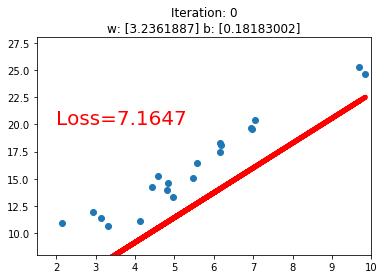

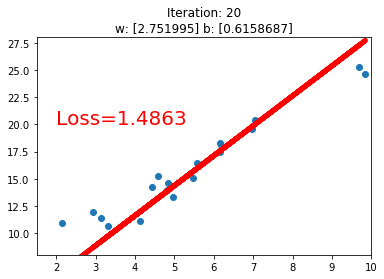

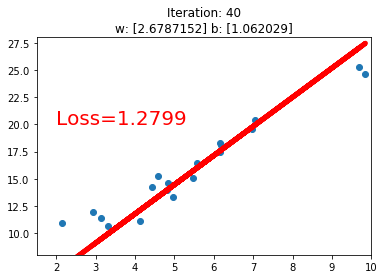

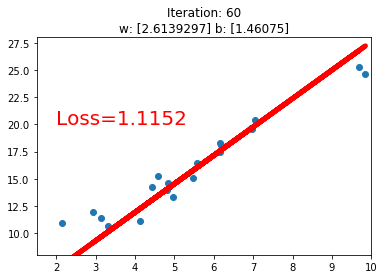

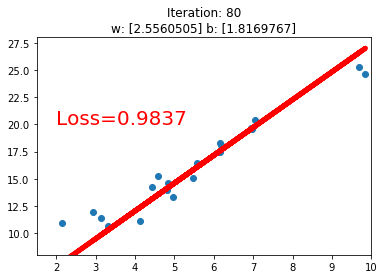

In [21]:
import torch
import matplotlib.pyplot as plt


torch.manual_seed(10) # 设置seed, 保证每次运行随机数产生一致，便于复现
iterations = 1000
lr = 0.05

x = torch.rand((20, 1)) * 10
y = 2*x + (5 + torch.randn((20, 1)))

w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(iterations):
  wx = torch.mul(w, x)
  y_pred = torch.add(wx, b)

  loss = (0.5 * (y - y_pred) ** 2).mean() # 使用所有样本的MSE, loss为标量

  loss.backward() # computes dloss/dx for every parameter x which has requires_grad=True. 
  b.data.sub_(lr * b.grad)
  w.data.sub_(lr * w.grad)
  
  w.grad.zero_() # grad will accumulate if not it is not cleared
  b.grad.zero_()
  
  # 绘图
  if iteration % 20 == 0:
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
    plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    plt.xlim(1.5, 10)
    plt.ylim(8, 28)
    plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
    plt.pause(0.5)

    if loss.data.numpy() < 1:
      break